## Cluster unlabeled data in **unsupervised machine** learning


In [4]:
# Reading: chapter 10

# Group similar clusters together, 
# Goal: To divid the data into distinct groups such that observations in each group is similar

**How it works**
* Chose number of K
    * There's no easy anser for a best 'k' value
    * But we can use a method called 'elbow method'
        * First computer the sum of squred error(sse) for some values of k
        * sse is defined by the sum of squared distance between cluster and its centroid.
        
        
        * If you plot against the SSE, you will find when the k value gets larger, sse value gets smaller. That's because when number of clusters increases, the distortion becomes smaller so the SSE should be smaller.
        * The idea of the 'elbow method' is to find the k value where the SSE **decreases abruptly** (elbow effect). 
        
        
        
* Randomly assign each point to a cluster
* Until clusters  stops changing repeat the following:
        * For each cluster, compute the centroid by taking the mean vector of points of the cluster
        * Assign each data point to the cluster for which the centroid is the closest

<!-- ![image.png](attachment:image.png =350px) -->
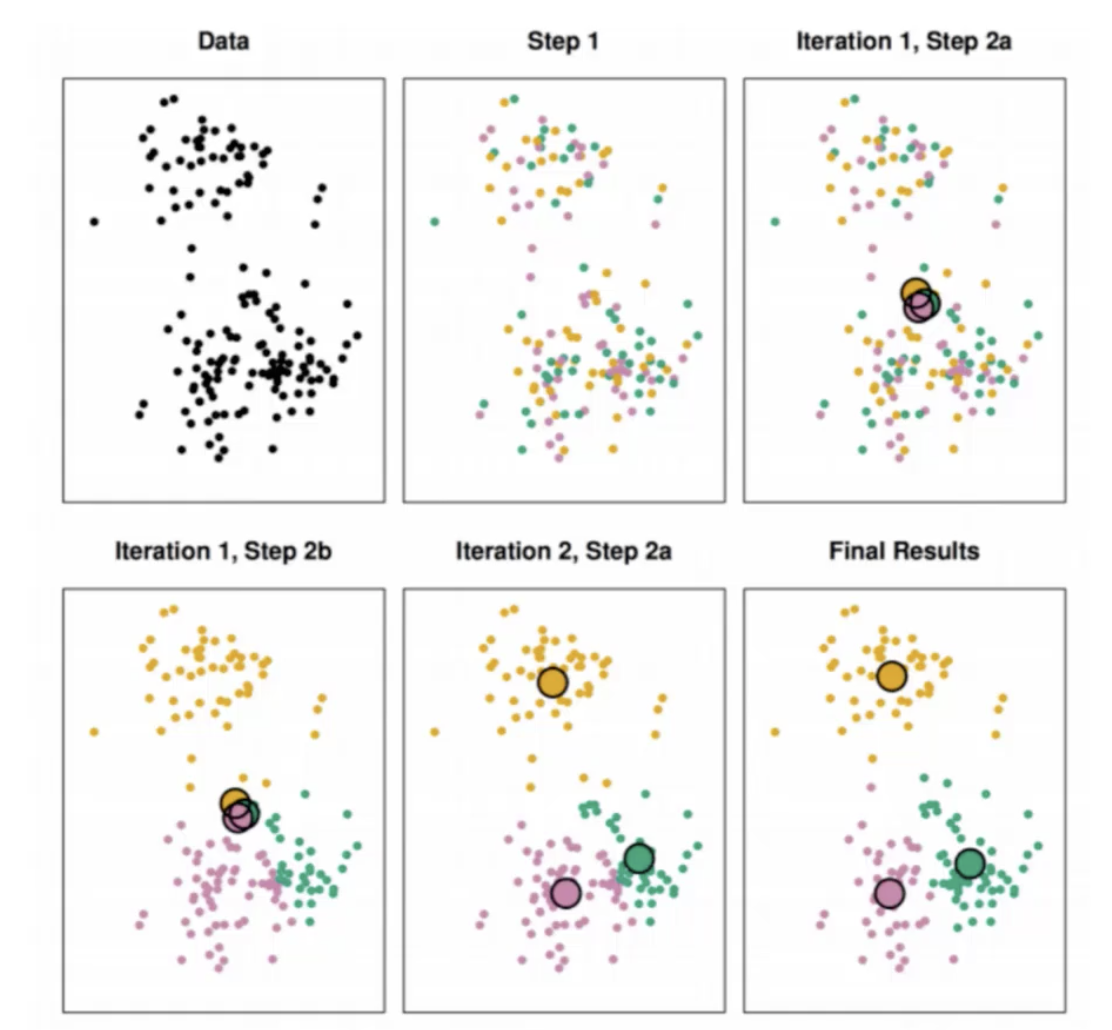

In [5]:
# Typical Clustering problems such as 

        # Cluster similar documents
        # Cluster customers based on features
        # Market segmentation
        # Identify similar physical groups
#

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

In [21]:
from sklearn.datasets import make_blobs

In [50]:
# Make_blob, generate a blob. 
# n_samples:
# Centers means the number of centroids.
# Higher the cluster_std is, the messier the data


data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [51]:
data[0].shape

(200, 2)

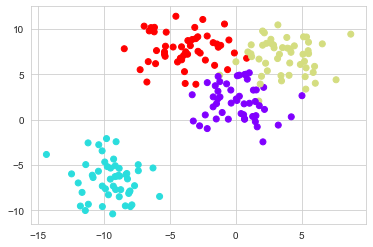

In [52]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [67]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [69]:
from sklearn.cluster import KMeans

In [133]:
kmeans = KMeans(n_clusters=4)

In [134]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [135]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [136]:
# Predicted labels, based off how many clusters we inputted

kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2], dtype=int32)

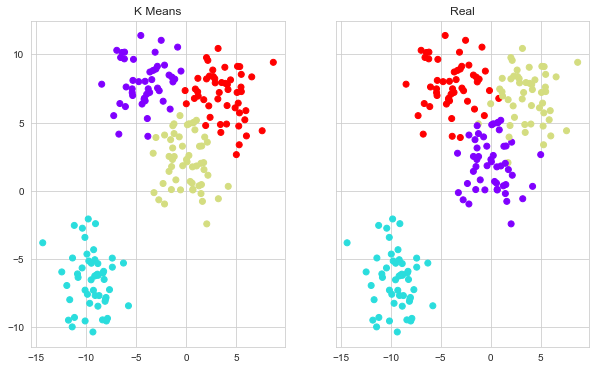

In [137]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')


ax2.set_title('Real')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

# COLORING IS MEANINGLESS. THE YELLOW BLOB ON THE LEFT IS NOT THE YELLOW BLOB ON THE RIGHT. DIFFERENT COLORS JUST TO
#   SEPERATE THE BLOBS FROM EACH OTHER